<a href="https://colab.research.google.com/github/cyanidekawaii/iit_intern/blob/main/Curve_Function_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting data to a function ~

*Why do we need to fit data to a function?*

the goal of function fitting is to choose values for the parameters in a function to best describe a set of data. If a specific meaningful form for the function with a small number of free parameters is known in advance, it is called *parametric fitting* [2].

~ to fit data to a function we follow the following steps [1]

In [ ]:
#import libraries
#import the curve_fit function from scipy [3]
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5)
from scipy.optimize import curve_fit

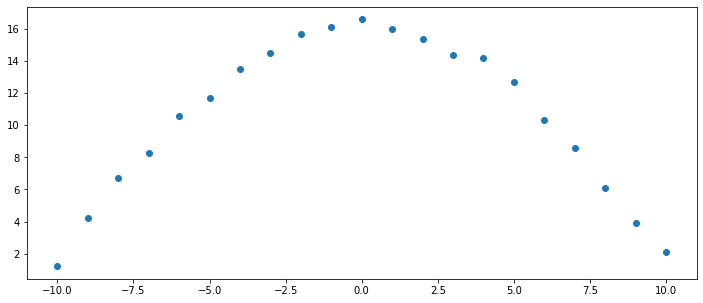

In [ ]:
#create a list or numpy array of an independent variable (x values) and a dependent variable (y values)
xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

#recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

#plot data
plt.plot(xdata, ydata, 'o')

let's take two functions ~

1. Gaussian Function: $y = Ae^{-Bx^{2}}$
2. Cosine Function: $Dcos(Ex)$

In [ ]:
#first function
#create a function for the equation we want to fit. The function should accept the independent variable(s) as inputs and all the parameters to be fit
#define the gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

In [ ]:
# use the function curve_fit from the python module scipy.optimize to fit our data [3].
# It uses non-linear least squares to fit data to a functional form.

In [ ]:
parameters, covariance = curve_fit(Gauss, xdata, ydata)

# the curve_fit func has three reqd inputs: function you want to fit, xdata, ydata.


# there are two outputs:

# 1. array of the optimal values of the parameters (A and B)
# 2. matrix of the estimated covariance of the parameters from which you can calculate the std error for the parameters

In [ ]:
#extract the fit parameters from the output of curve_fit
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

16.934286340519687
0.015739600927241554


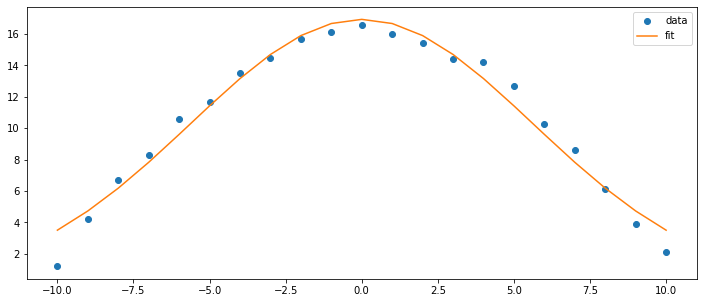

In [ ]:
#use function to calculate y values using the fit model to see how well the model fits the data
fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()
#graphing original data and the fit equation

so, we're looking at the original data alongside with the fit equation that we came up with using a function(gauss in this case) and by getting the best fit values of A and B.

In [ ]:
# to calculate the standard error of the parameters from the covariance, you take the square root of the diagonal elements of the matrix

In [ ]:
SE = np.sqrt(np.diag(covariance))
SE_A = SE[0]
SE_B = SE[1]

print(F'The value of A is {fit_A:.5f} with standard error of {SE_A:.5f}.')
print(F'The value of B is {fit_B:.5f} with standard error of {SE_B:.5f}.')

The value of A is 16.93429 with standard error of 0.35658.
The value of B is 0.01574 with standard error of 0.00087.


~ now we take the cosine function: $DCos(Ex)$

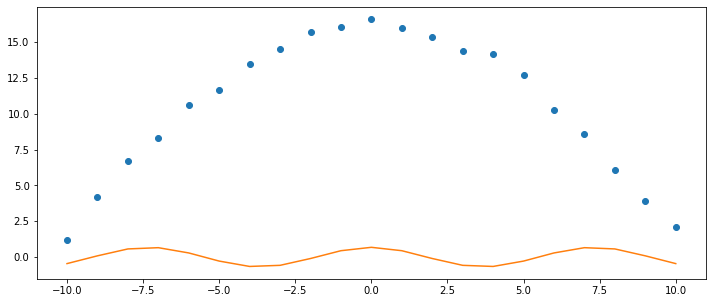

In [ ]:
#following the same steps as above
def cos_func(x, D, E):
    y = D*np.cos(E*x)
    return y

parameters, covariance = curve_fit(cos_func, xdata, ydata)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')

~ to fix this fit we need to give a guess for what we think the parameters could be.

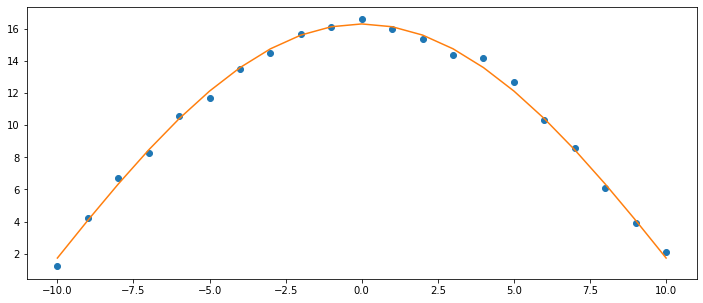

In [ ]:
guess = [16, 0.1]#height - D param, E param - no of cycles in the 0 to 2pi interval
parameters, covariance = curve_fit(cos_func, xdata, ydata, p0=guess)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')